In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os 
import pandas as pd
import seaborn as sns
import tensorflow as tf
import scipy.sparse as sp
from tqdm import tqdm


In [2]:
df = pd.read_csv("Data//2019-Dec.csv")

In [3]:
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,NaN,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,NaN,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,NaN,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,NaN,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,NaN,NaN,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5
...,...,...,...,...,...,...,...,...,...
3533281,2019-12-31 23:59:39 UTC,view,5683350,1487580005671109489,NaN,masura,2.84,536812729,e4a2d47c-a956-4c46-8176-745f52ea664b
3533282,2019-12-31 23:59:46 UTC,view,5888097,1487580013388628160,NaN,shik,179.05,503658154,2dde9867-9e71-4a64-880d-aa68b66aae6d
3533283,2019-12-31 23:59:51 UTC,view,59975,1487580012096782476,NaN,NaN,7.14,595414541,4c6d80bb-5dd3-4fbb-b592-187b51db2753
3533284,2019-12-31 23:59:52 UTC,view,5775982,1783999063314661546,NaN,NaN,11.90,397780878,7e8a2b85-153a-44eb-a71f-b748fde14fcc


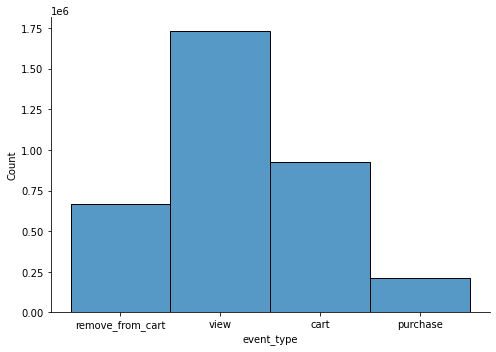

In [4]:
sns.displot(
  data=df,
  x="event_type",
  kind="hist",
  aspect=1.4
)

In [5]:
corr = df.corr()

In [6]:
corr 

,product_id,category_id,price,user_id
product_id,1.000000,0.004830,-0.011298,-0.019767
category_id,0.004830,1.000000,-0.010693,-0.001420
price,-0.011298,-0.010693,1.000000,0.038059
user_id,-0.019767,-0.001420,0.038059,1.000000


In [7]:
corr.style.background_gradient(cmap='coolwarm')

,product_id,category_id,price,user_id
product_id,1.000000,0.004830,-0.011298,-0.019767
category_id,0.004830,1.000000,-0.010693,-0.001420
price,-0.011298,-0.010693,1.000000,0.038059
user_id,-0.019767,-0.001420,0.038059,1.000000


In [8]:
from numpy.random import randint
import os
import implicit
import scipy.sparse as sparse



In [9]:
df['category_id'].value_counts()

1487580007675986893    216293
1487580005595612013    128438
1487580005092295511    123455
1602943681873052386    117336
1487580006317032337    104204
                        ...  
1487580006056985476         1
1487580013363462335         1
1487580011140481125         1
1487580012851757223         1
1933472286753424063         1
Name: category_id, Length: 482, dtype: int64

In [10]:
## I will select a category with maximum clicks to build our recommendation system on. 
## intuitively, it does not make sense to recommend items of one category if the user is searching for an item in some other category.
## Ex. you don not get recommendations of t-shirts if you are searching for wallets in the 'accessories' category.

In [11]:
df_for_one_cat = df[df['category_id']==1487580007675986893]
df_for_one_cat.shape

(216293, 9)

In [12]:
df_for_one_cat

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,NaN,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
24,2019-12-01 00:01:15 UTC,cart,5904369,1487580007675986893,NaN,NaN,1.59,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
40,2019-12-01 00:02:16 UTC,cart,5862313,1487580007675986893,NaN,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
71,2019-12-01 00:03:17 UTC,cart,5904747,1487580007675986893,NaN,NaN,1.59,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
114,2019-12-01 00:04:21 UTC,cart,5904253,1487580007675986893,NaN,NaN,1.59,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
...,...,...,...,...,...,...,...,...,...
3532894,2019-12-31 23:19:12 UTC,remove_from_cart,5862259,1487580007675986893,NaN,freedecor,1.43,375265648,fb524f63-4e6d-4cc1-930b-9c698079d3df
3532895,2019-12-31 23:19:14 UTC,remove_from_cart,5862268,1487580007675986893,NaN,freedecor,1.43,375265648,fb524f63-4e6d-4cc1-930b-9c698079d3df
3532896,2019-12-31 23:19:14 UTC,remove_from_cart,5862268,1487580007675986893,NaN,freedecor,1.43,375265648,fb524f63-4e6d-4cc1-930b-9c698079d3df
3532898,2019-12-31 23:19:17 UTC,remove_from_cart,5877610,1487580007675986893,NaN,bpw.style,1.27,375265648,fb524f63-4e6d-4cc1-930b-9c698079d3df


In [13]:
df_for_one_cat.loc[df_for_one_cat['user_id'].isin(df_for_one_cat.user_id.unique())] 
## since we are selecting a single category, we only want the buys information from those sessions. 

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,NaN,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
24,2019-12-01 00:01:15 UTC,cart,5904369,1487580007675986893,NaN,NaN,1.59,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
40,2019-12-01 00:02:16 UTC,cart,5862313,1487580007675986893,NaN,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
71,2019-12-01 00:03:17 UTC,cart,5904747,1487580007675986893,NaN,NaN,1.59,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
114,2019-12-01 00:04:21 UTC,cart,5904253,1487580007675986893,NaN,NaN,1.59,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
...,...,...,...,...,...,...,...,...,...
3532894,2019-12-31 23:19:12 UTC,remove_from_cart,5862259,1487580007675986893,NaN,freedecor,1.43,375265648,fb524f63-4e6d-4cc1-930b-9c698079d3df
3532895,2019-12-31 23:19:14 UTC,remove_from_cart,5862268,1487580007675986893,NaN,freedecor,1.43,375265648,fb524f63-4e6d-4cc1-930b-9c698079d3df
3532896,2019-12-31 23:19:14 UTC,remove_from_cart,5862268,1487580007675986893,NaN,freedecor,1.43,375265648,fb524f63-4e6d-4cc1-930b-9c698079d3df
3532898,2019-12-31 23:19:17 UTC,remove_from_cart,5877610,1487580007675986893,NaN,bpw.style,1.27,375265648,fb524f63-4e6d-4cc1-930b-9c698079d3df


In [14]:
df_for_one_cat

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,NaN,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
24,2019-12-01 00:01:15 UTC,cart,5904369,1487580007675986893,NaN,NaN,1.59,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
40,2019-12-01 00:02:16 UTC,cart,5862313,1487580007675986893,NaN,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
71,2019-12-01 00:03:17 UTC,cart,5904747,1487580007675986893,NaN,NaN,1.59,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
114,2019-12-01 00:04:21 UTC,cart,5904253,1487580007675986893,NaN,NaN,1.59,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
...,...,...,...,...,...,...,...,...,...
3532894,2019-12-31 23:19:12 UTC,remove_from_cart,5862259,1487580007675986893,NaN,freedecor,1.43,375265648,fb524f63-4e6d-4cc1-930b-9c698079d3df
3532895,2019-12-31 23:19:14 UTC,remove_from_cart,5862268,1487580007675986893,NaN,freedecor,1.43,375265648,fb524f63-4e6d-4cc1-930b-9c698079d3df
3532896,2019-12-31 23:19:14 UTC,remove_from_cart,5862268,1487580007675986893,NaN,freedecor,1.43,375265648,fb524f63-4e6d-4cc1-930b-9c698079d3df
3532898,2019-12-31 23:19:17 UTC,remove_from_cart,5877610,1487580007675986893,NaN,bpw.style,1.27,375265648,fb524f63-4e6d-4cc1-930b-9c698079d3df


In [15]:
df_for_one_cat.drop(columns=['category_code','brand','price'], inplace = True)
df_for_one_cat.drop(columns=['category_id'], inplace = True)
df_for_one_cat['event_time'] = pd.to_datetime(df_for_one_cat['event_time'])

C:\Users\GamerPc\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\GamerPc\AppData\Local\Temp/ipykernel_18168/2978619342.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_one_cat['event_time'] = pd.to_datetime(df_for_one_cat['event_time'])


In [16]:
df_for_one_cat.drop(columns=['user_session'], inplace = True)

In [17]:
df_for_one_cat

,event_time,event_type,product_id,user_id
3,2019-12-01 00:00:05+00:00,view,5848413,348405118
24,2019-12-01 00:01:15+00:00,cart,5904369,348405118
40,2019-12-01 00:02:16+00:00,cart,5862313,348405118
71,2019-12-01 00:03:17+00:00,cart,5904747,348405118
114,2019-12-01 00:04:21+00:00,cart,5904253,348405118
...,...,...,...,...
3532894,2019-12-31 23:19:12+00:00,remove_from_cart,5862259,375265648
3532895,2019-12-31 23:19:14+00:00,remove_from_cart,5862268,375265648
3532896,2019-12-31 23:19:14+00:00,remove_from_cart,5862268,375265648
3532898,2019-12-31 23:19:17+00:00,remove_from_cart,5877610,375265648


In [18]:
df_for_one_cat.groupby(['user_id','product_id'])['event_type'].count().reset_index()


,user_id,product_id,event_type
0,13392135,5906114,1
1,28129653,5809249,1
2,28129653,5848909,1
3,28129653,5848910,2
4,28129653,5866172,1
...,...,...,...
106772,595344562,5848429,1
106773,595353546,5833330,1
106774,595355118,5833325,1
106775,595371899,5848910,2


In [19]:
data=df_for_one_cat[ df_for_one_cat['user_id'] == 13392135 ]
data=data[["event_type","product_id"]]
data[data["product_id"] ==5906114].sort_index(ascending=False).iloc[0,0]=="purchase"

False

In [20]:
ratings = [] 

In [21]:
def check_if_it_is_purchased(k):
    return k.sort_index(ascending=False).iloc[0,0]=="purchase"

In [22]:
def if_has_only_view(k):
    return len(k) == len(k[ k["event_type"] == "view" ])

In [23]:
def calculate_viewing_score(k,all_data):
    if (len(k[k["event_type"]=="view"])==0):
        return 0
    return k.groupby(by="event_type").count().tail(1).iloc[0,0] / all_data.groupby(by="event_type").count().tail(1).iloc[0,0]

In [24]:
def get_last_event(k):
    droped_viewing=k[k["event_type"] != "view" ]
    return droped_viewing.sort_index(ascending=False).iloc[0,0]

In [25]:
def rating_calculator(user_id,product_id):
    rating=0
    data1=df_for_one_cat[ df_for_one_cat['user_id'] == user_id ]
    data1=data1[["event_type","product_id"]]
    data=data1[data1["product_id"] ==product_id]
    if check_if_it_is_purchased(data):
        rating=rating+4+calculate_viewing_score(data,data1)
    elif if_has_only_view(data):
        rating=rating+calculate_viewing_score(data,data1)
    else:
        last_event=get_last_event(data)   
        if last_event== "cart":    
            rating=rating+3+calculate_viewing_score(data,data1)
        else:
            rating=rating+2+calculate_viewing_score(data,data1)
    return rating        

In [26]:
df_for_one_cat.iloc[0,2]

5848413

In [27]:
import time
ratings=[]
start = time.time()
for i in range (106777):
    product_id=df_for_one_cat.iloc[i,2]
    user_id=df_for_one_cat.iloc[i,3]
    ratings.append(rating_calculator(user_id,product_id))
end = time.time()
print(end - start)    

275.6336851119995


In [28]:
df_users_items=df_for_one_cat.groupby(['user_id','product_id'])['event_type'].count().reset_index()

In [29]:
df_users_items["rating"]=ratings

In [30]:
df_users_items

,user_id,product_id,event_type,rating
0,13392135,5906114,1,0.500000
1,28129653,5809249,1,2.000000
2,28129653,5848909,1,2.000000
3,28129653,5848910,2,2.000000
4,28129653,5866172,1,2.000000
...,...,...,...,...
106772,595344562,5848429,1,1.000000
106773,595353546,5833330,1,0.166667
106774,595355118,5833325,1,3.062500
106775,595371899,5848910,2,0.166667


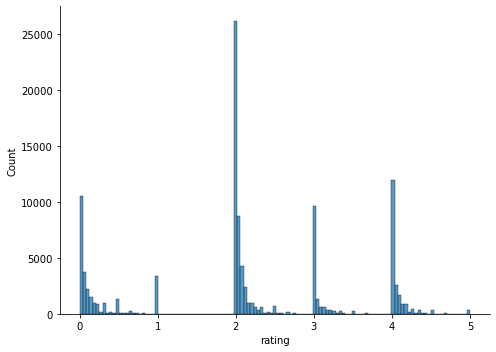

In [31]:
sns.displot(
  data=df_users_items,
  x="rating",
  kind="hist",
  aspect=1.4
)

In [32]:
df_users_items['user_id'] = df_users_items['user_id'].astype("category")
df_users_items['product_id'] = df_users_items['product_id'].astype("category")
df_users_items['userID_enc'] = df_users_items['user_id'].cat.codes
df_users_items['itemID_enc'] = df_users_items['product_id'].cat.codes

In [33]:
df_users_items

,user_id,product_id,event_type,rating,userID_enc,itemID_enc
0,13392135,5906114,1,0.500000,0,2036
1,28129653,5809249,1,2.000000,1,372
2,28129653,5848909,1,2.000000,1,741
3,28129653,5848910,2,2.000000,1,742
4,28129653,5866172,1,2.000000,1,955
...,...,...,...,...,...,...
106772,595344562,5848429,1,1.000000,17563,720
106773,595353546,5833330,1,0.166667,17564,596
106774,595355118,5833325,1,3.062500,17565,591
106775,595371899,5848910,2,0.166667,17566,742


In [34]:
## we create the mappings for the userIDs and itemIDs with their encodings. This would be useful during the time of testing.

cat_item_map = dict(enumerate(df_users_items['product_id'].cat.categories))
item_cat_map = dict((v,k) for k,v in cat_item_map.items())
cat_user_map = dict(enumerate(df_users_items['user_id'].cat.categories))
user_cat_map = dict((v,k) for k,v in cat_user_map.items())

In [35]:
df_users_items['itemID_enc'].drop_duplicates()

0         2036
1          372
2          741
3          742
4          955
          ... 
104452      76
105260    2367
105532      74
106006    2362
106007    2363
Name: itemID_enc, Length: 2388, dtype: int16

In [36]:
df_users_items['userID_enc']

0             0
1             1
2             1
3             1
4             1
          ...  
106772    17563
106773    17564
106774    17565
106775    17566
106776    17567
Name: userID_enc, Length: 106777, dtype: int16

In [37]:
## Implicit ALS model requires item-user sparsematrix as input, so below we are building the same. 
sparse_item_user = sparse.csr_matrix((df_users_items['rating'].astype(float), (df_users_items['itemID_enc'], df_users_items['userID_enc'])))
sparse_user_item = sparse.csr_matrix((df_users_items['rating'].astype(float), (df_users_items['userID_enc'], df_users_items['itemID_enc'])))

In [38]:
als = implicit.als.AlternatingLeastSquares(factors=20, regularization=0.1, iterations=20)

C:\Users\GamerPc\anaconda3\lib\site-packages\implicit\utils.py:31: UserWarning: Intel MKL BLAS detected. Its highly recommend to set the environment variable 'export MKL_NUM_THREADS=1' to disable its internal multithreading
  warnings.warn(


In [39]:
alpha_val = 15
sparse_item_user = (sparse_item_user * alpha_val).astype('double')

In [40]:
als.fit(sparse_item_user, show_progress=True)

  0%|          | 0/20 [00:00<?, ?it/s]

In [41]:
bpr = implicit.bpr.BayesianPersonalizedRanking(factors=20, regularization=0.1, iterations=20)

In [42]:
sparse_item_user = sparse.csr_matrix((df_users_items['rating'].astype(float), (df_users_items['itemID_enc'], df_users_items['userID_enc'])))

In [43]:
bpr.fit(sparse_item_user , show_progress=True)

  0%|          | 0/20 [00:00<?, ?it/s]

In [44]:
##Generating Predictions


In [45]:
## As a baseline, we can generate the recommendations by considering only the top n items corresponding to the query item. 
## Since it is item based similarity, we cannot capture the user behaviour/preferences into this i.e recommendation is not personalized.
def get_item_recs(model = als,n_similar = 6):
    item_recs = []

    for item_id in df_for_one_cat['product_id'].values:

        similar = model.similar_items(item_cat_map[item_id], n_similar)
        similar = similar[1:]
        items_cat = [x[0] for x in similar]
        items = [cat_item_map[x] for x in items_cat]
        item_recs.append(items)
    return item_recs

In [46]:
## Here, since we take the dot product of the user's latent vector with that of the item latent vectors, we'll be able to personalize the recommendations
## to the user.

def get_user_item_recs(model = als,n_rec=5):

    user_item_recs = []

    for user_id in df_for_one_cat['user_id'].values:
    
        recommended = model.recommend(user_cat_map[user_id], sparse_user_item, n_rec)
        items_cat = [x[0] for x in recommended]
        items = [cat_item_map[x] for x in items_cat]
        user_item_recs.append(items)
    return user_item_recs

In [47]:
## The above method is good for personalized recommendations, but, since we also want to consider the context of the query, we would be assuming that 
## all the products are equally similar to the query product, which would seldom be true. 
## Hence, we are taking the weighted average of both item based similarity scores and the user-item similarity scores. 

def get_ensemble_recs(model=als, n_rec=3):
    item_vecs = model.item_factors
    user_vecs = model.user_factors
    item_norms = np.sqrt((item_vecs * item_vecs).sum(axis=1))
    ensemble_recs = []

    for item_id,user_id in zip(df_for_one_cat['product_id'],df_for_one_cat['user_id']):
        item_scores = item_vecs.dot(item_vecs[item_cat_map[item_id]])/item_norms
    
        user_interactions = sparse_user_item[user_cat_map[user_id],:].toarray()
        user_interactions = user_interactions.reshape(-1) + 1
        user_interactions[user_interactions >1] = 0
        rec_vector = user_vecs[user_cat_map[user_id],:].dot(item_vecs.T)
        user_scores = user_interactions*rec_vector

        ensemble_scores = 0.5*item_scores + 0.5*user_scores
        best = np.argpartition(ensemble_scores, -3)[-3:]
        top_items = sorted(zip(best, ensemble_scores[best]), key=lambda x: -x[1])

        top_items_cat = [x[0] for x in top_items]
        top_items = [cat_item_map[x] for x in top_items_cat]
        ensemble_recs.append(top_items)
    return ensemble_recs

In [48]:
actuals=list(df_users_items['itemID_enc'].drop_duplicates())

In [49]:
##als_user_item_recs = get_user_item_recs()
##print("als_item_recs mapk: ", metrics.mapk(actuals,als_user_item_recs,3))

In [50]:
sparse_user_item = sparse.csr_matrix((df_users_items['rating'].astype(float), (df_users_items['userID_enc'], df_users_items['itemID_enc'])))

In [51]:
recommended = als.recommend(15000,sparse_user_item.getrow(15000),15) ## there is a problem here that i cannot solve 

IndexError: index 15000 is out of bounds for axis 0 with size 2388

In [52]:
recommended

NameError: name 'recommended' is not defined

In [53]:
als2 = implicit.als.AlternatingLeastSquares(factors=20, regularization=0.1, iterations=20)

In [54]:
alpha_val = 15
sparse_user_item2 = (sparse_user_item * alpha_val).astype('double')

In [55]:
als2.fit(sparse_user_item2)

  0%|          | 0/20 [00:00<?, ?it/s]

In [60]:
recommended = als2.recommend(150,sparse_user_item.getrow(150),2)

In [61]:
recommended

(array([596, 915]), array([1.367198 , 1.2172971], dtype=float32))